### Exploratory Data Analysis of 

### First Step - Importing the Libraries

In [39]:
# Numpy = Numeric Computing
import numpy as np
# MatPlotLib = classic Python math plotting library
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.style as stl
# Pandas = Python Data Analysis, home of the DataFrame
import pandas as pd
# Seaborn = Statistical plotting built on top of MatPlotLib
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#sql engine
from sqlalchemy import create_engine   
#database connection variables 
import config 

import yellowbrick as yb
from yellowbrick.features import RadViz
from yellowbrick.features import Rank2D
from yellowbrick.features import FeatureImportances
from yellowbrick.model_selection import LearningCurve
from yellowbrick.target import BalancedBinningReference

#from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

import os

sns.set(style="ticks", color_codes=True)

# Tell MatPlotLib to draw plots inline with the code outputs
%matplotlib inline

# If you have a Mac or other high-res display you can include this:
%config InlineBackend.figure_format = 'retina'

In [2]:
# Skip this block if reading from disk

# create sqlalchemy engine
engine = create_engine('mysql+mysqlconnector://{user}:{password}@{host}/{dbname}'
                       .format(user=config.db_user,
                               password=config.db_pass,
                               dbname=config.db_main,
                               host=config.db_host))

In [9]:
#Skip this block if reading from local disk

#Create Query Statments

queryModel = "SELECT * FROM Fire_Intensity_Model_Clean LIMIT 1000000;"

In [10]:
#Skip this block if reading from local disk

#Execute Queries
dfModel = pd.read_sql(queryModel, engine)

#close the database connection
engine.dispose()

In [11]:
#Save data to local disk

#Execute Queries
dfModel.to_csv('/Users/nahidmacbook/Predicting-Wildfires/data/Model.csv', index = False)

In [12]:
#Read the data from disk for faster access

#read the raw data from the database stored on disk

dfModel = pd.read_csv('/Users/nahidmacbook/Predicting-Wildfires/data/Model.csv')


In [13]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*dfModel.shape))

1000000 instances with 26 features



### Description of Top-Level Key Statistics

In [34]:
# Use pandas to get the summary statistics on the data
dfModel.describe()

,Unnamed: 0,latitude,longitude,doy,month,year,fire_region,season,covertype,fuelcode,...,fuel_moisture_class,temperature,humidity,precip_intensity,visibility,wind_speed,wind_gust,brightness,bright_t31,frp
count,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,...,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06,1.328922e+06
mean,6.644605e+05,3.705568e+01,-9.944511e+01,1.846206e+02,6.578925e+00,2.009052e+03,2.742743e+00,1.332939e+00,2.347098e+00,8.302211e+02,...,2.261374e+00,6.996215e+01,4.110999e-01,2.685751e-03,9.216293e+00,6.365645e+00,1.168200e+01,3.238604e+02,2.958293e+02,5.874439e+01
std,3.836269e+05,5.853105e+00,1.399614e+01,9.325962e+01,3.057256e+00,3.661934e+00,2.119584e+00,1.046869e+00,8.792922e-01,7.093216e+02,...,7.075931e-01,1.498959e+01,1.685367e-01,5.439401e-02,1.689755e+00,4.144523e+00,6.044896e+00,2.226737e+01,9.548646e+00,1.825209e+02
min,0.000000e+00,2.454570e+01,-1.246325e+02,1.000000e+00,1.000000e+00,2.003000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,-2.897000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+02,2.645000e+02,-5.920000e+01
25%,3.322302e+05,3.238690e+01,-1.141925e+02,9.800000e+01,4.000000e+00,2.006000e+03,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,6.063000e+01,2.900000e-01,0.000000e+00,9.216293e+00,3.540000e+00,7.460000e+00,3.098000e+02,2.902000e+02,1.020000e+01
50%,6.644605e+05,3.590130e+01,-9.624380e+01,1.970000e+02,7.000000e+00,2.009000e+03,2.000000e+00,1.000000e+00,3.000000e+00,1.160000e+03,...,2.000000e+00,7.039000e+01,4.000000e-01,0.000000e+00,9.997000e+00,5.420000e+00,1.088000e+01,3.179000e+02,2.955000e+02,2.040000e+01
75%,9.966908e+05,4.163170e+01,-8.777145e+01,2.620000e+02,9.000000e+00,2.012000e+03,4.000000e+00,2.000000e+00,3.000000e+00,1.280000e+03,...,3.000000e+00,7.955000e+01,5.300000e-01,0.000000e+00,9.997000e+00,8.100000e+00,1.441000e+01,3.302000e+02,3.008000e+02,4.720000e+01
max,1.328921e+06,4.899260e+01,-6.700420e+01,3.660000e+02,1.200000e+01,2.015000e+03,7.000000e+00,3.000000e+00,3.000000e+00,2.950000e+03,...,4.000000e+00,1.395500e+02,1.000000e+00,3.937000e+00,1.000000e+01,6.630000e+01,1.379700e+02,5.065000e+02,4.001000e+02,1.324670e+04


In [105]:
dfModel = pd.read_csv('/Users/nahidmacbook/Documents/DataScience/Data-Wildfire/FireIntensity_Model_June12_Clean.csv')

In [112]:
dfFeatures = dfModel.drop(columns=[ 'Unnamed: 0', 'latitude', 'longitude', 'doy', 'month', 'year', 'wind_gust', 'brightness', 'bright_t31', 'frp', 'visibility', 'fuelcode','fire_intensity_fourcat', 'fire_intensity_threecat','fire_intensity_twocat', 'fire_intensity'])

### Identifying Most Important Features

In [97]:
features = ['fire_region', 'season', 'fuel_moisture_class', 'prefire_fuel', 'temperature', 'humidity', 'precip_intensity', 'wind_speed']
cat_features = ['fire_region', 'season', 'fuelcode', 'fuel_moisture_class']

num_features = ['prefire_fuel', 'temperature', 'humidity', 'precip_intensity', 'wind_gust', 'wind_speed', 'latitude','longitude']

target = ['fire_intensity_fourcat'] # four categories using balanced binning

y = dfModel[target]
y = np.ravel(y)
y = LabelEncoder().fit_transform(y)
X = dfModel[features]

#### Breaking categorical features into two cat

In [ ]:
dfModel['season_twocat']=

### Pearson Ranking

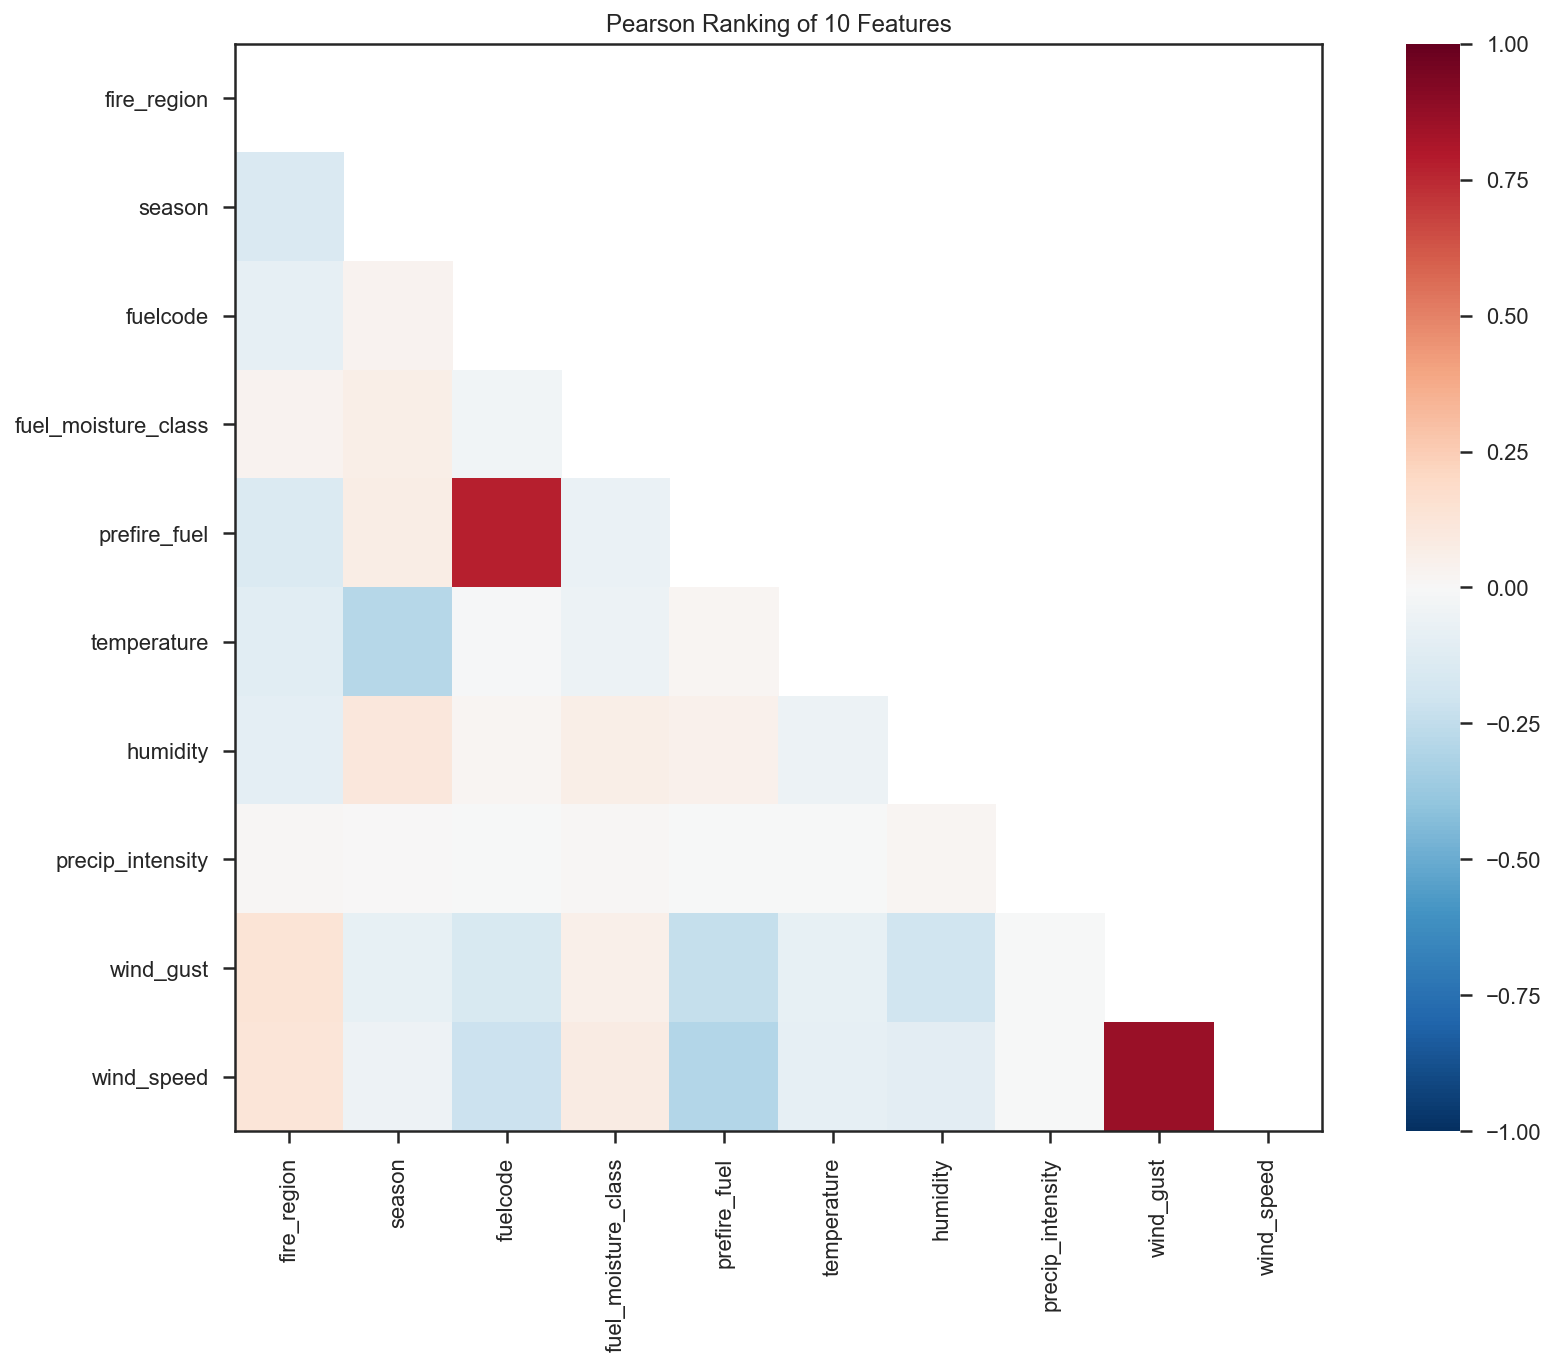

In [44]:

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', features=features, size=(1080, 720))

X = dfModel[features]

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

In [ ]:
# Visualize the Intensity distribution by region
fig, ax = plt.subplots()
ax.hist(dfModel['fire_region'], bins=8, range = (dfModel['fire_region'].min(),emstat['fire_region'].max()))
plt.title('Fire Intensity by region')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()



N = 8
GroupedDf = dfModel.groupby(['fire_region','fire_intensity_fourcat']).count()
Low = GroupedDf(['fire_intensity_fourcat']=='Low' & ['fire_region']=='0')
Medium = (25, 32, 34, 20, 25)
High = (2, 3, 4, 1, 2)
Severe = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd) 

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

### Feature Importance - Extra Tree Classifier

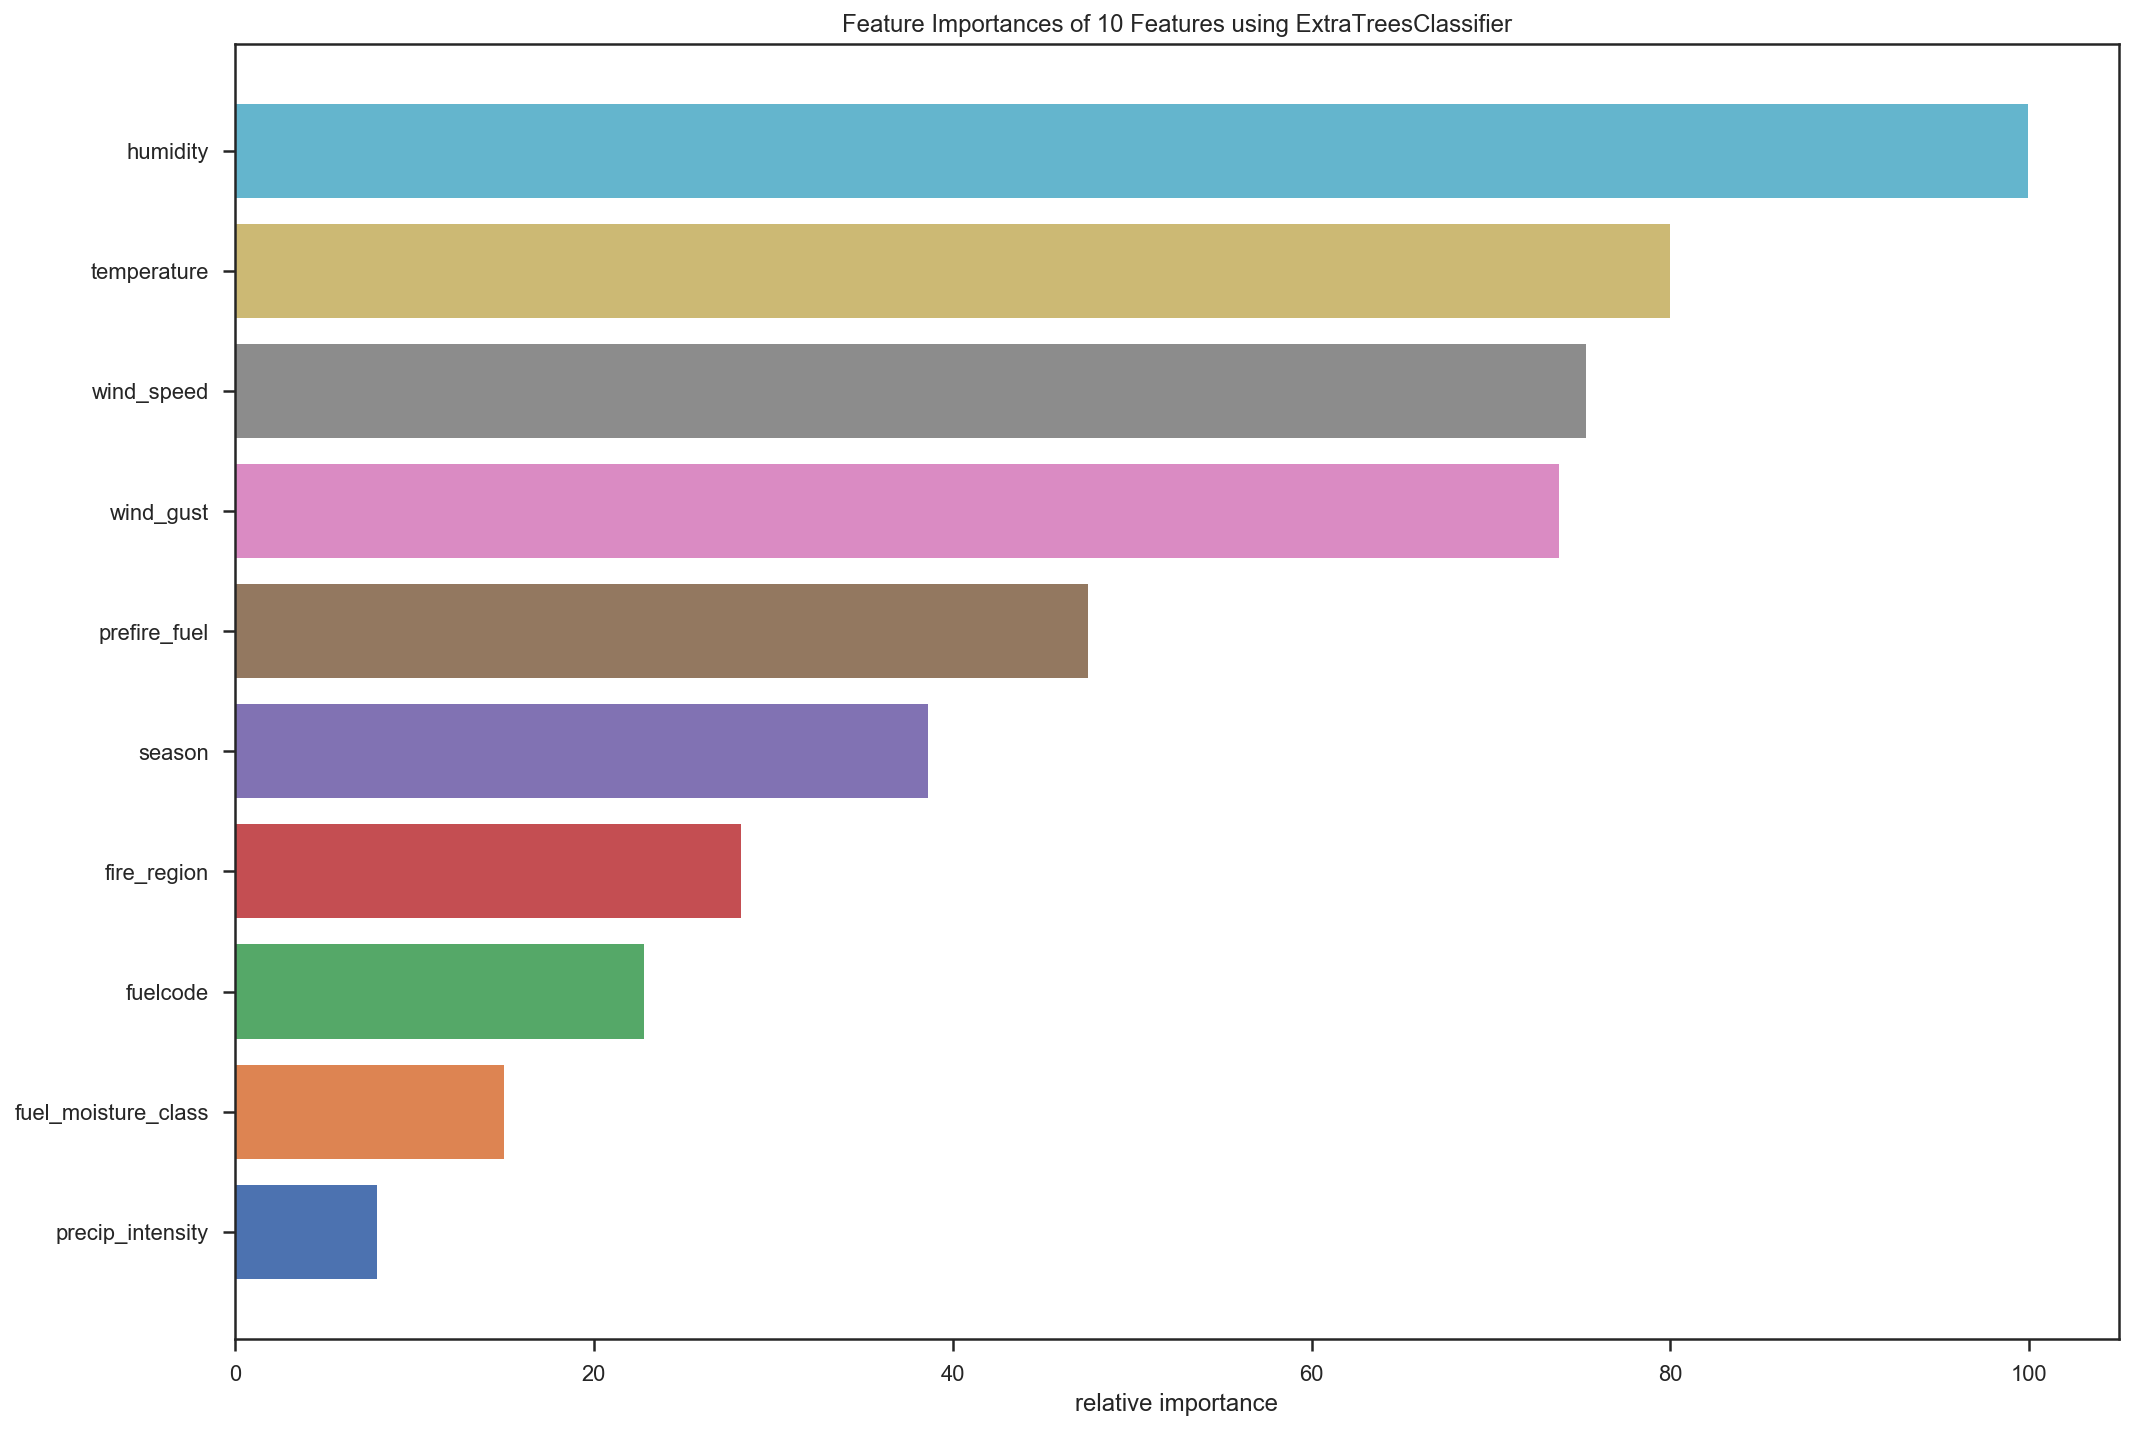

In [42]:
model = ExtraTreesClassifier(n_estimators=5)
viz = FeatureImportances(model, labels=features, size=(1080, 720))

viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()



##### Dropping the FuelCode as it is highly correlated with prefire_fuel
##### Dropping the wind_gust as it is highly correlated with wind_speed

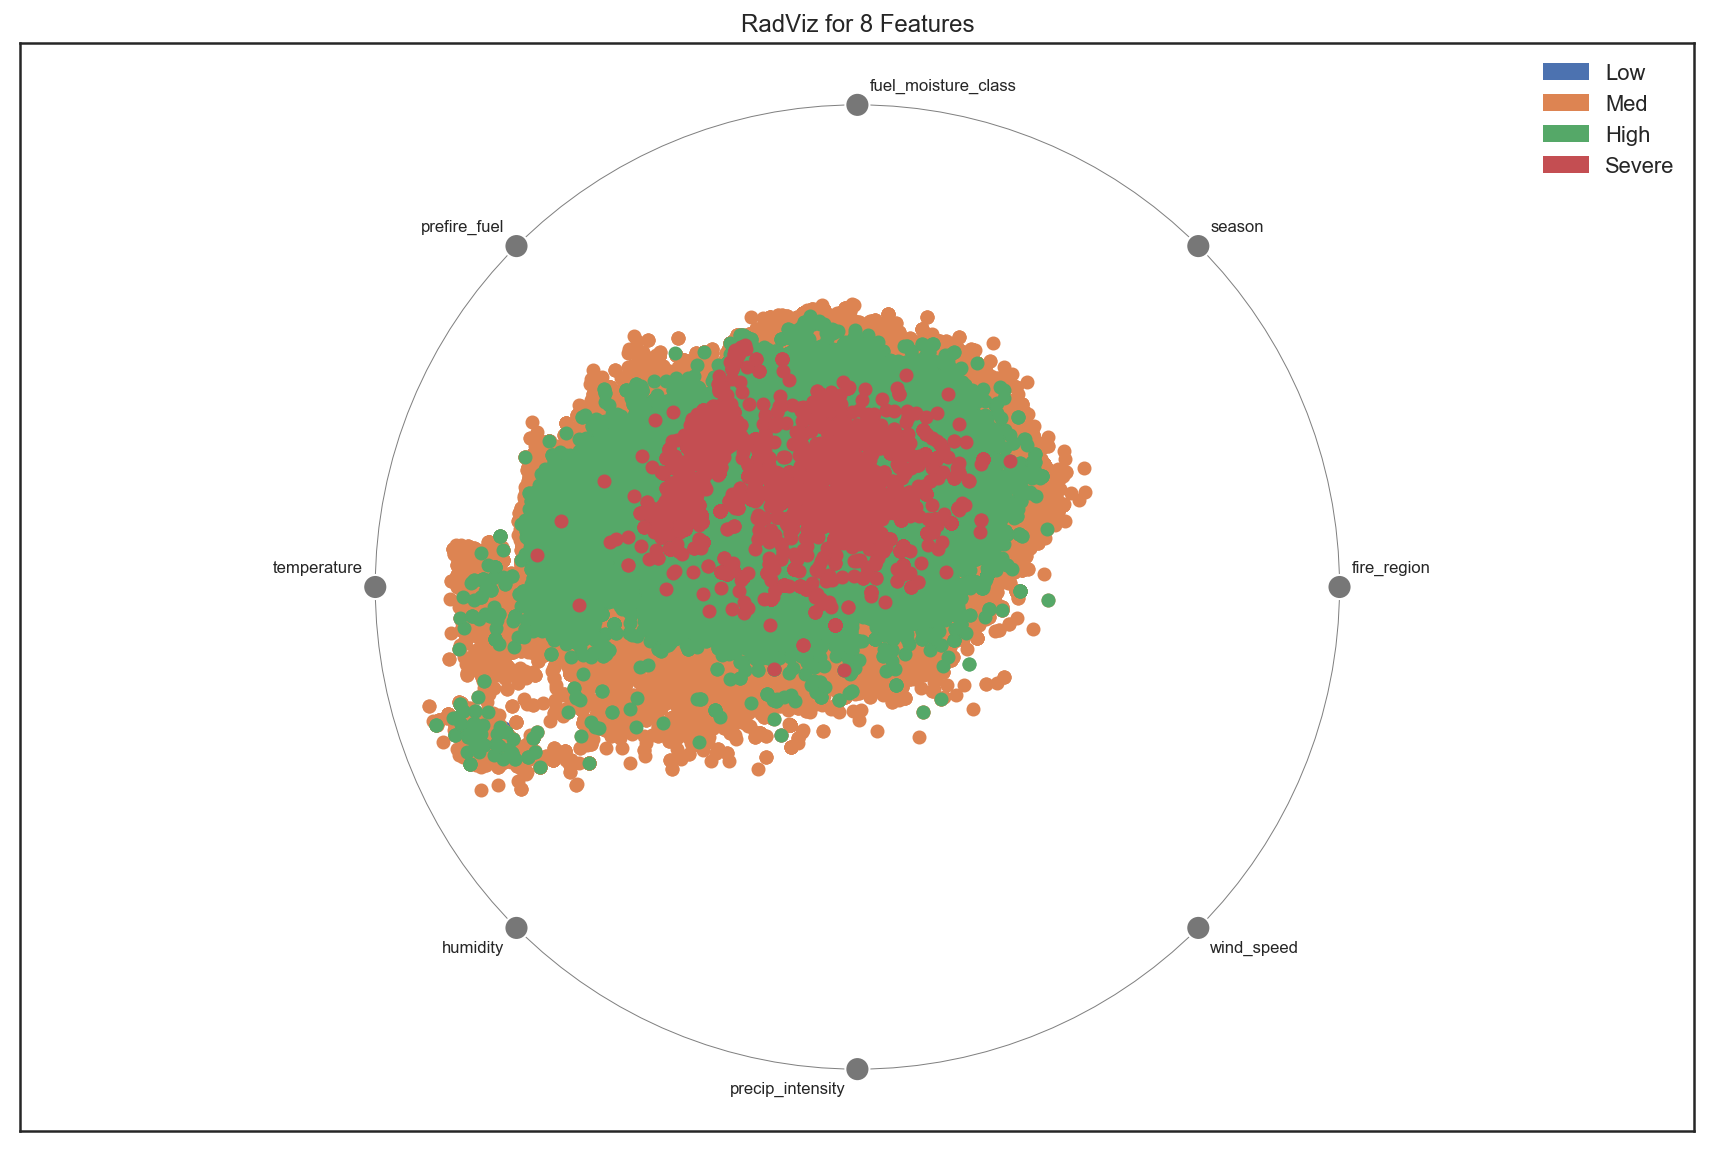

In [98]:
# Specify the target classes, burn severity 
classes = ["Low", "Med", "High", "Severe"]


# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)       # Transform the data
visualizer.show()              # Draw the data

### BoxPlot

In [114]:
feature_names = list(dfFeatures.columns)


features = dfFeatures[feature_names]
scaler = MinMaxScaler().fit_transform(features.values, (0, 50))

dfFeatures[feature_names] = scaler

X = dfFeatures[feature_names]


/Users/nahidmacbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


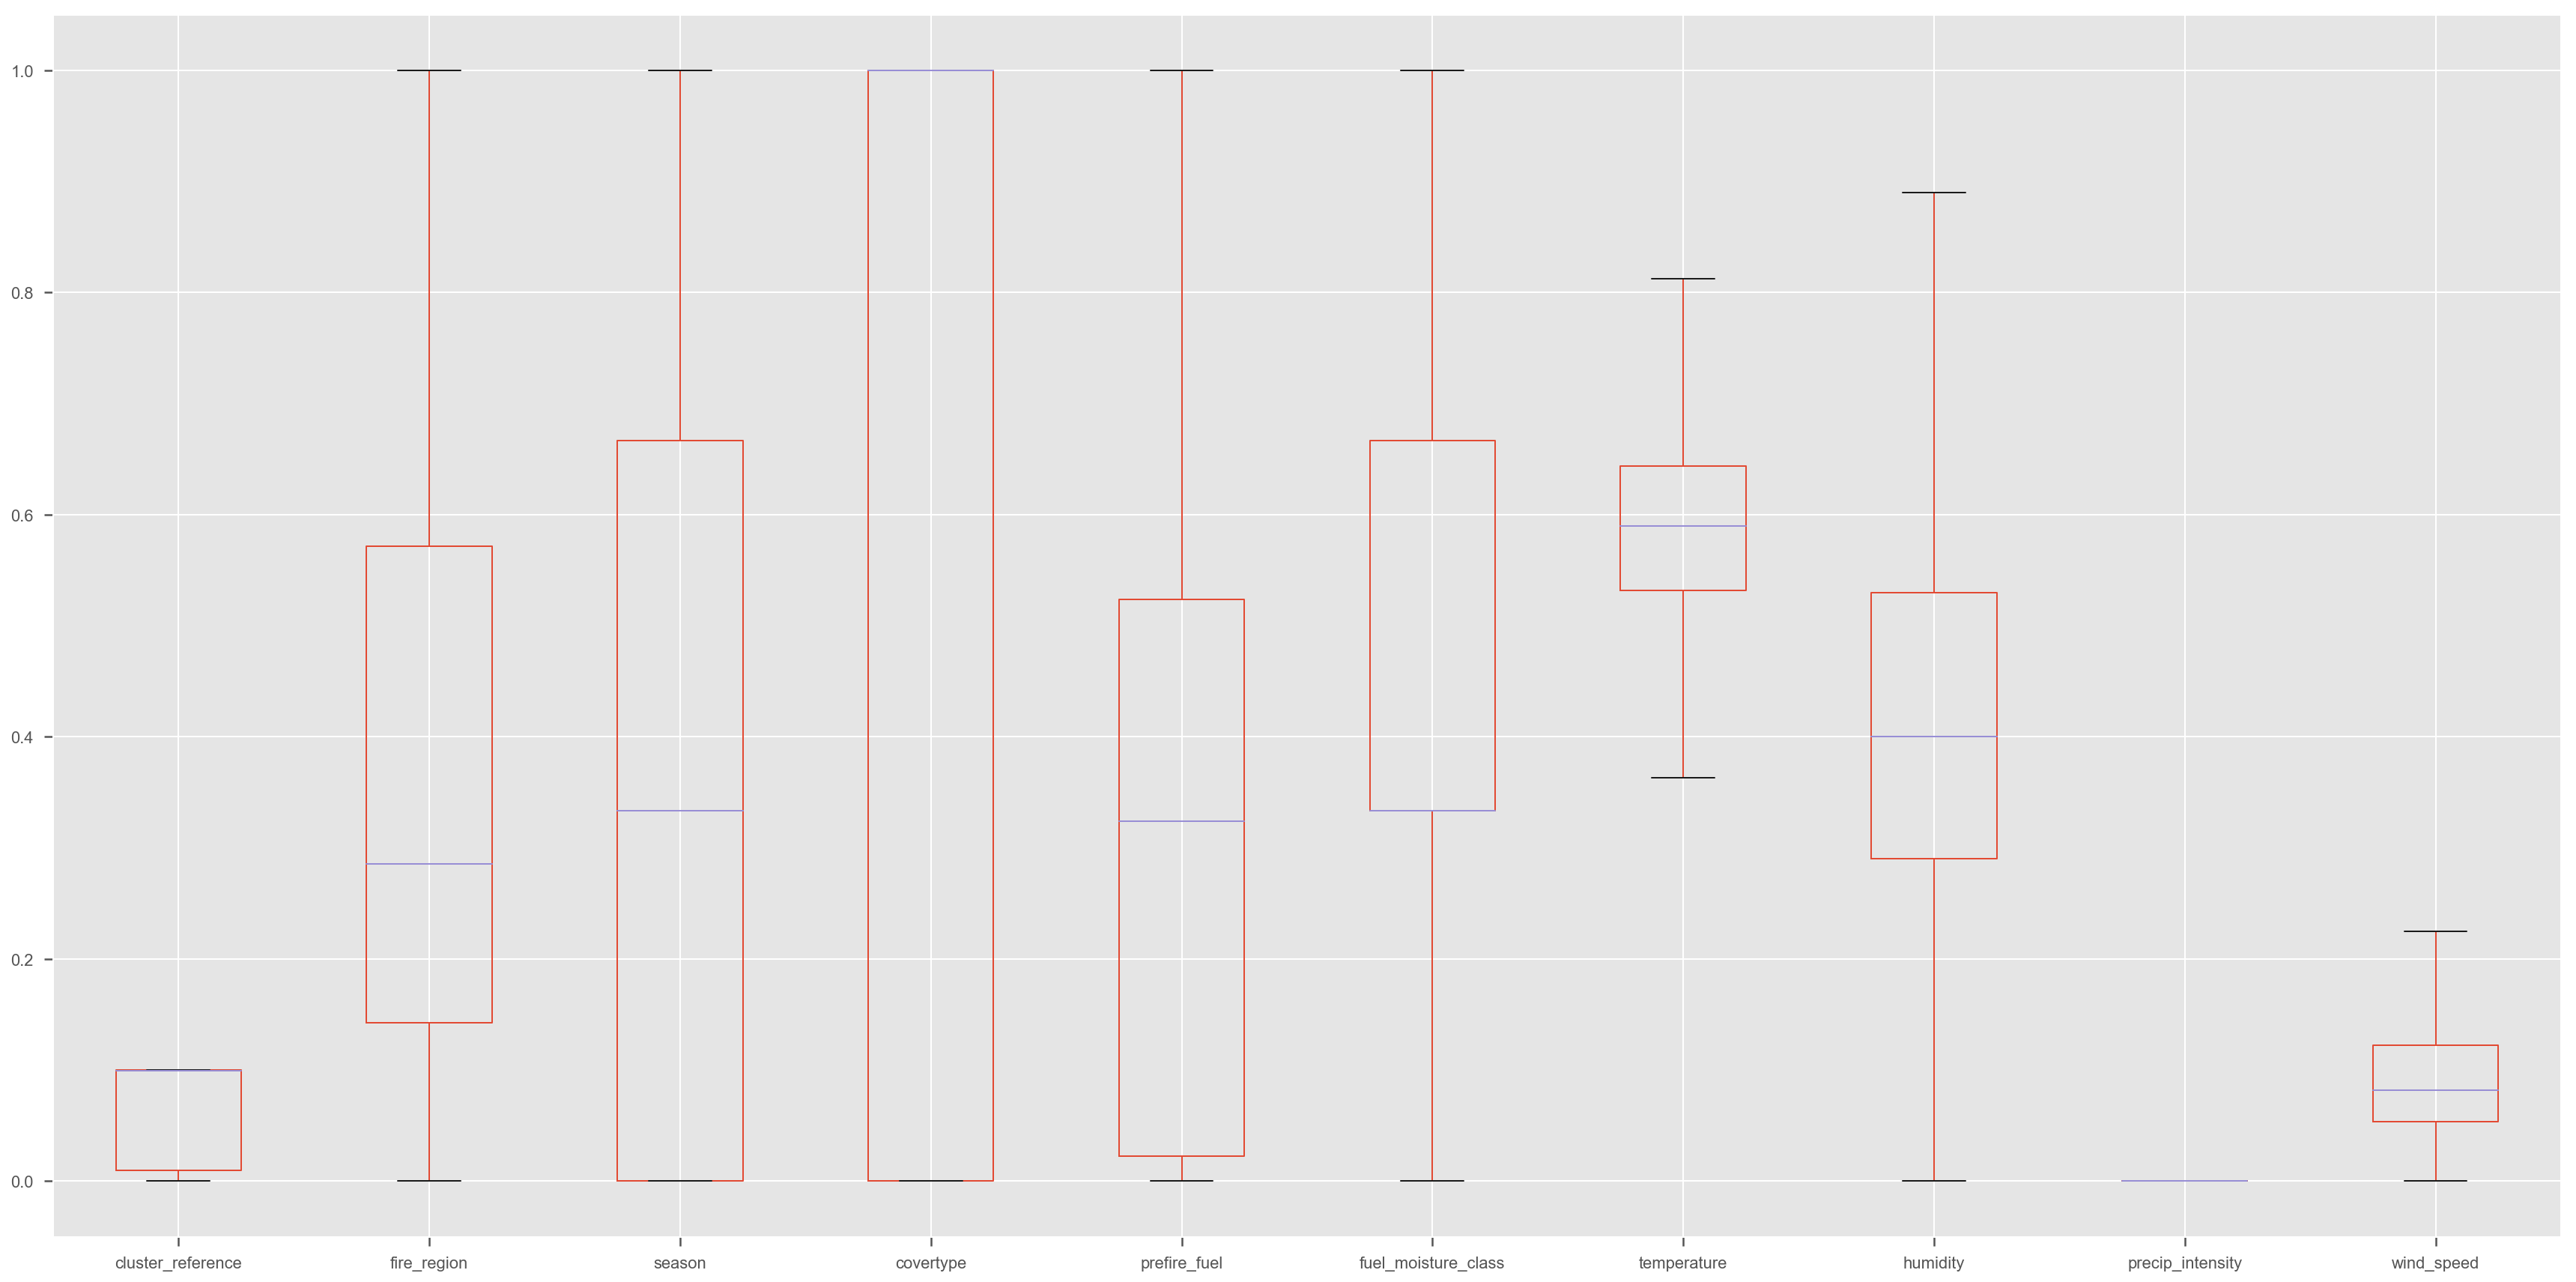

In [115]:

matplotlib.style.use('ggplot')
dfFeatures.plot(kind='box',figsize=(30,15))

#### Cat Plot of the Effects of Seasonal Changes of Temperature on Fire Intensity - Four Cat

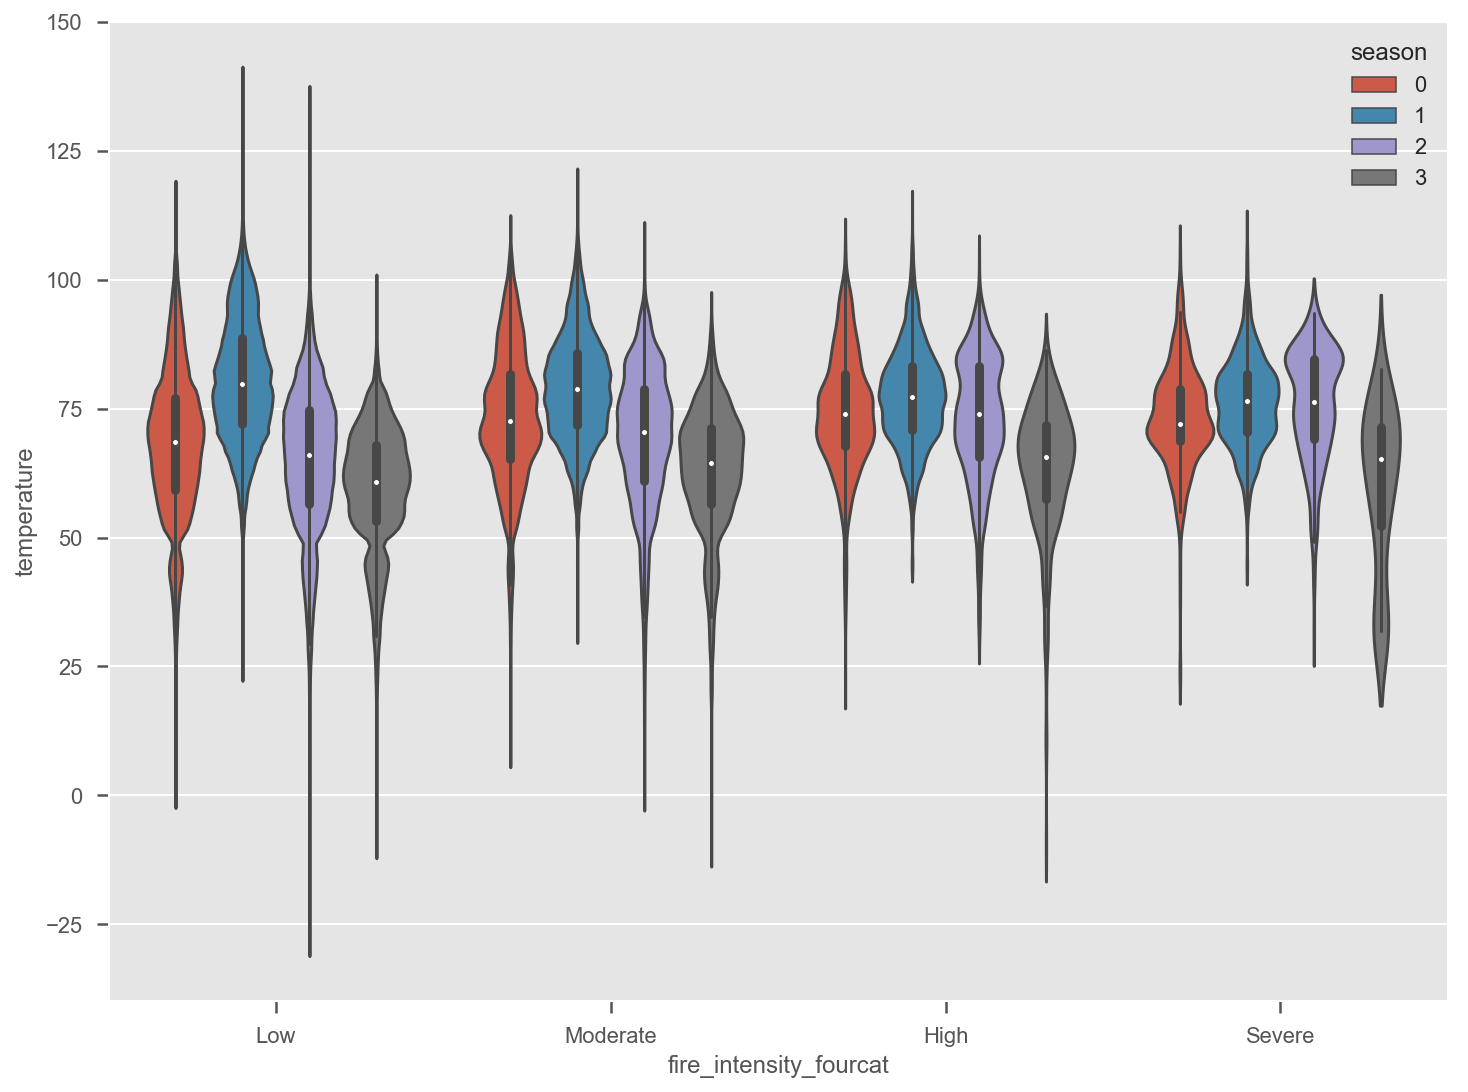

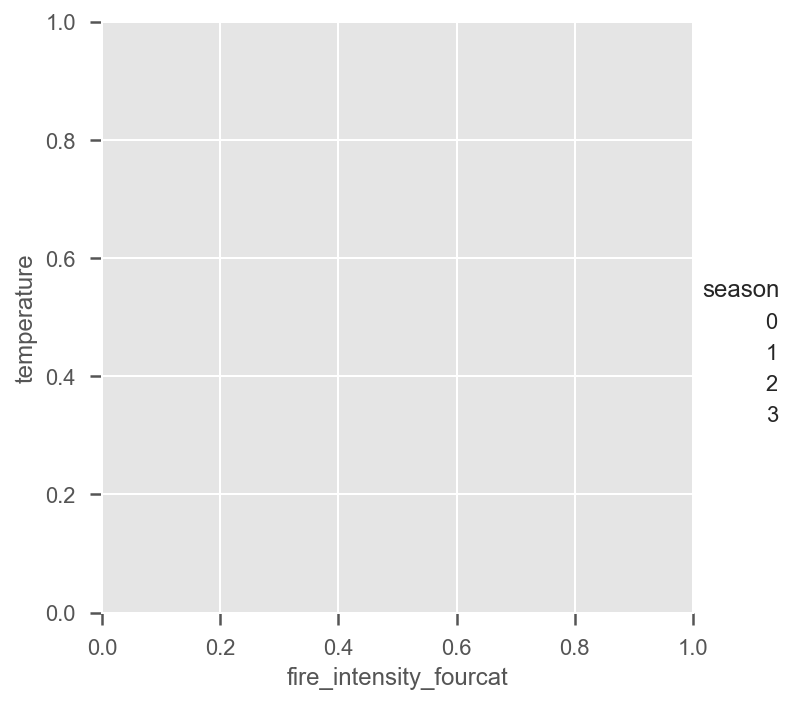

In [121]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.catplot(x="fire_intensity_fourcat", y="temperature", hue="season",
                data=dfModel, kind="violin", ax=ax)

#### Cat Plot of the Effects of Seasonal Changes of Wind Speed on Fire Intensity - Four Cat

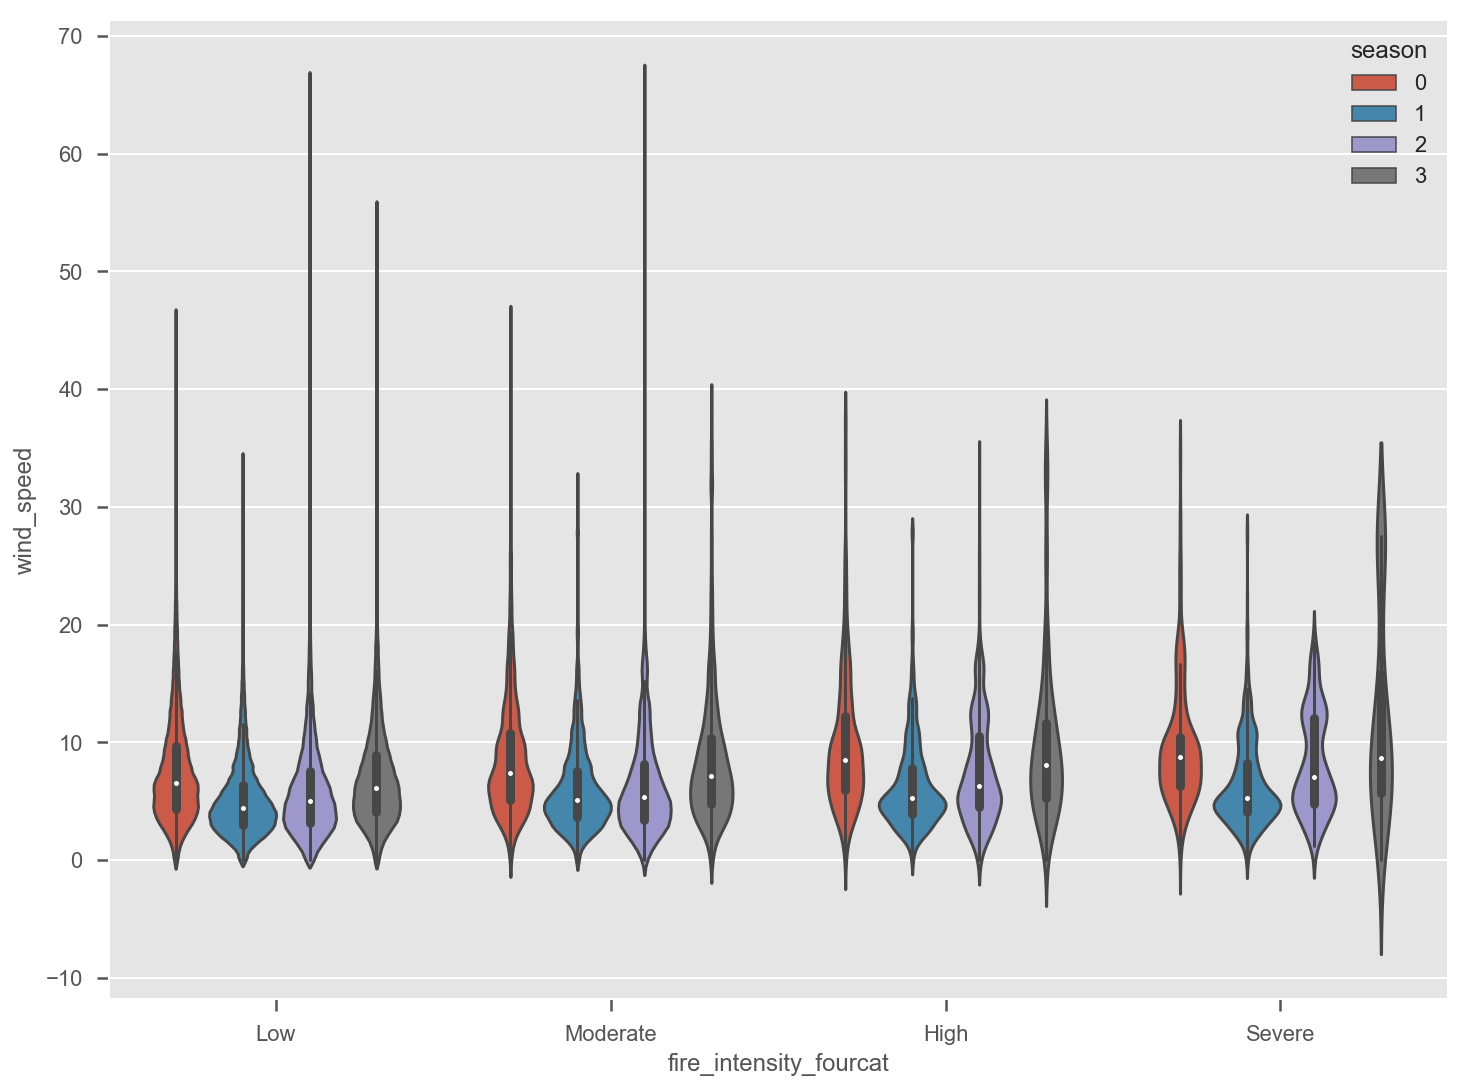

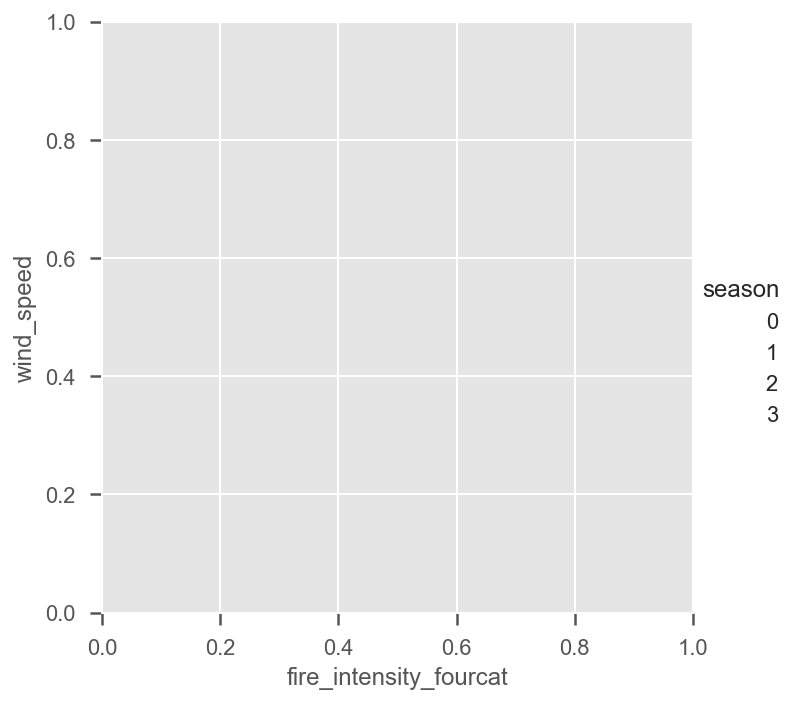

In [123]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.catplot(x="fire_intensity_fourcat", y="wind_speed", hue="season",
                data=dfModel, kind="violin", ax=ax)

#### Cat Plot of the Effects of Seasonal Changes of Temperature on Fire Intensity - Two Cat

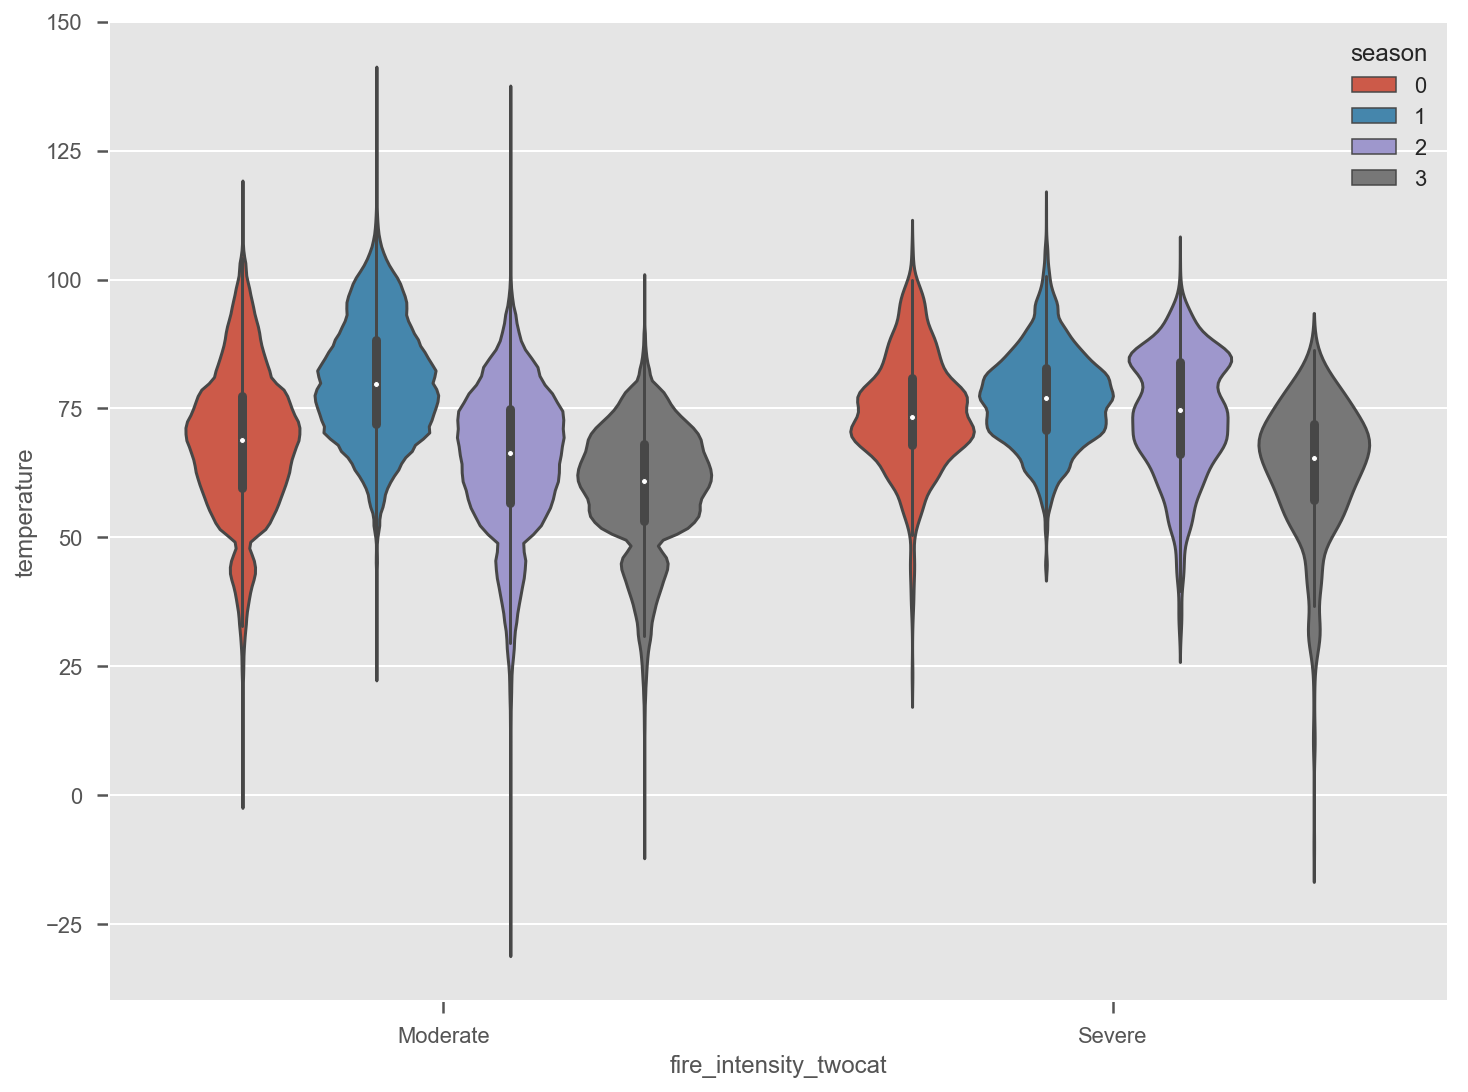

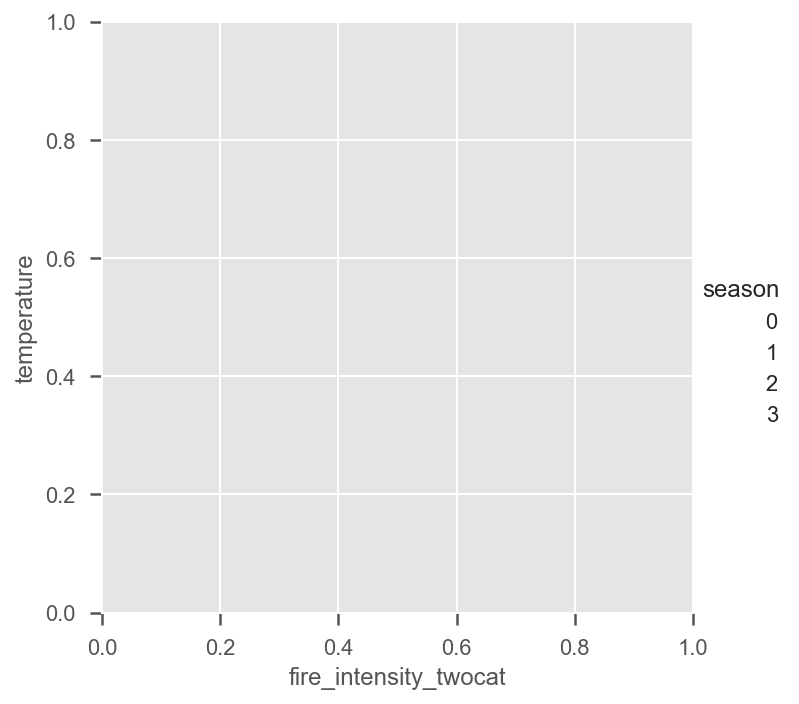

In [124]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.catplot(x="fire_intensity_twocat", y="temperature", hue="season",
                data=dfModel, kind="violin", ax=ax)

#### Cat Plot of the Effects of Seasonal Changes of Wind Speed on Fire Intensity - Two Cat

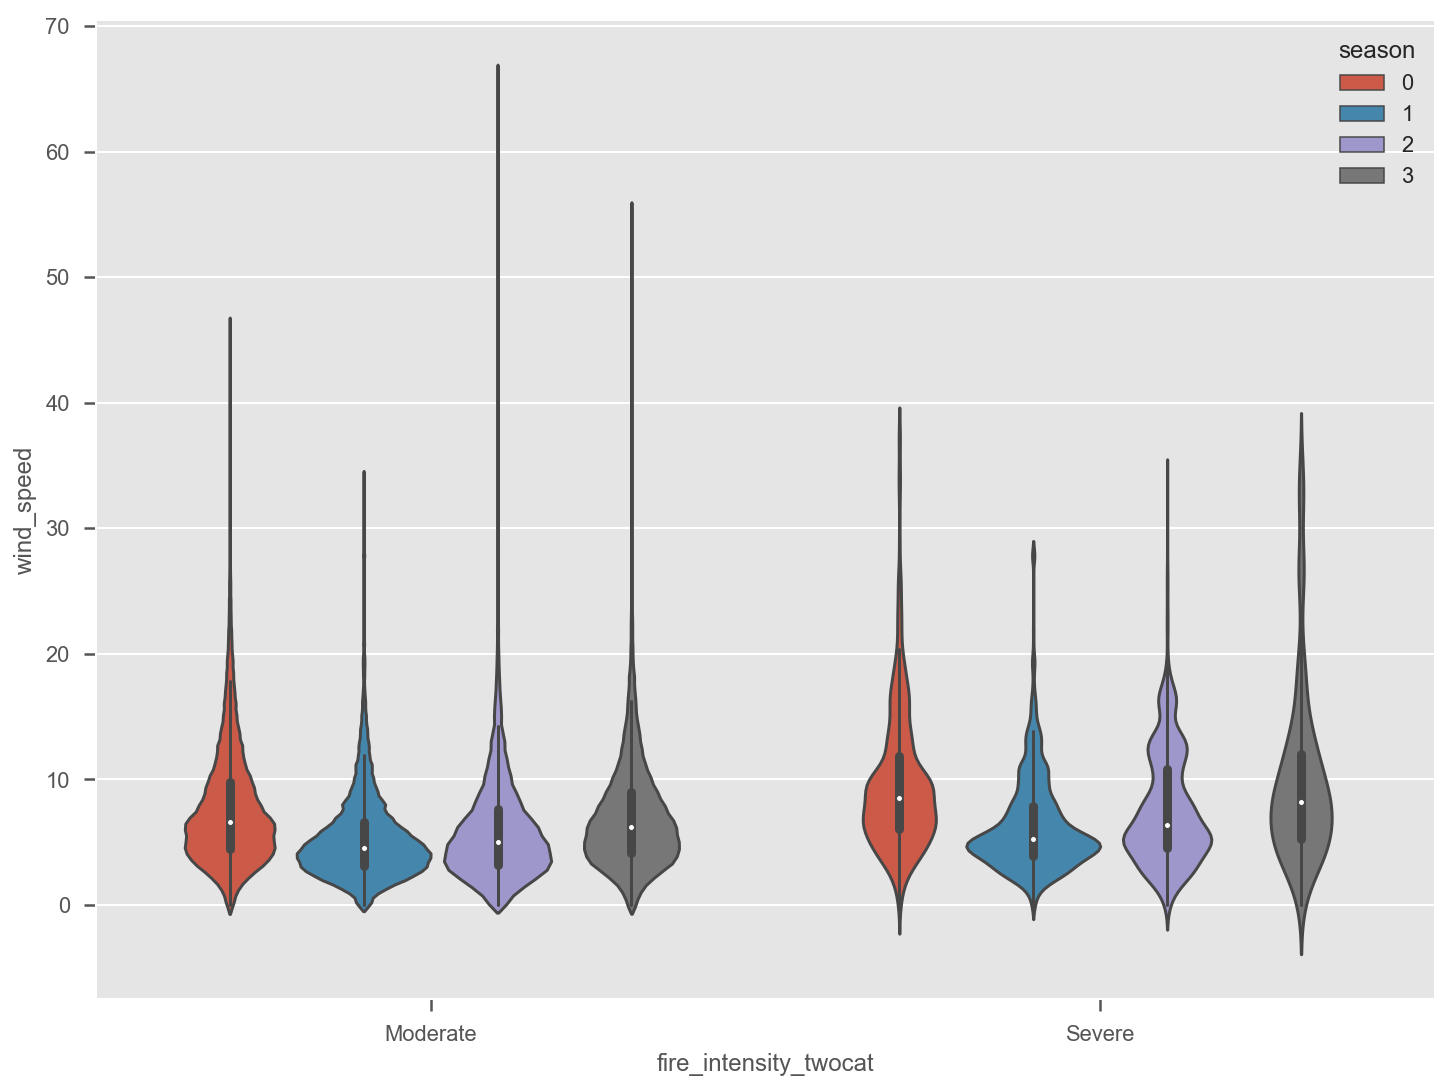

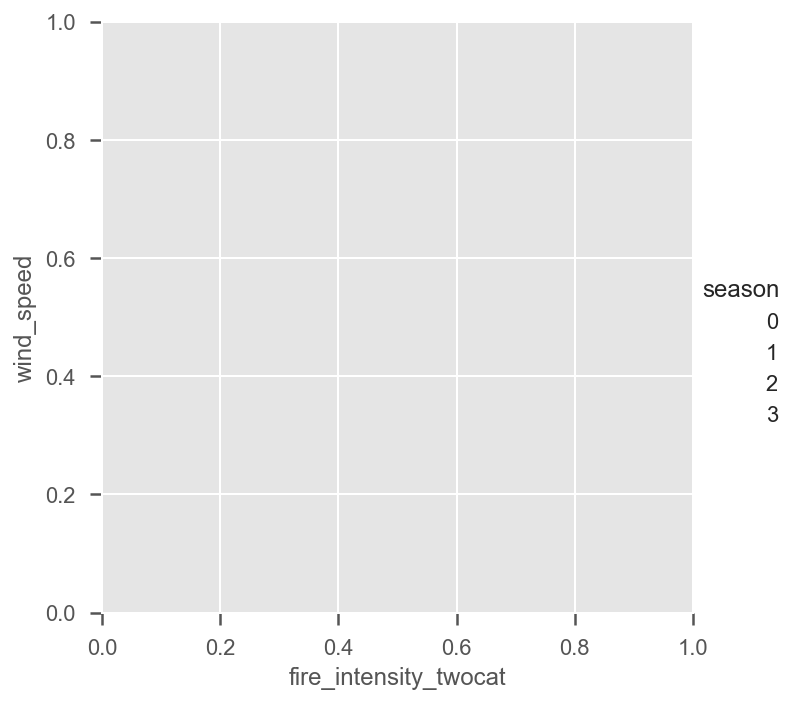

In [126]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.catplot(x="fire_intensity_twocat", y="wind_speed", hue="season",
                data=dfModel, kind="violin", ax=ax)

#### Violin Plots of the Effects of Seasonal Changes of Temperature on Fire Intensity

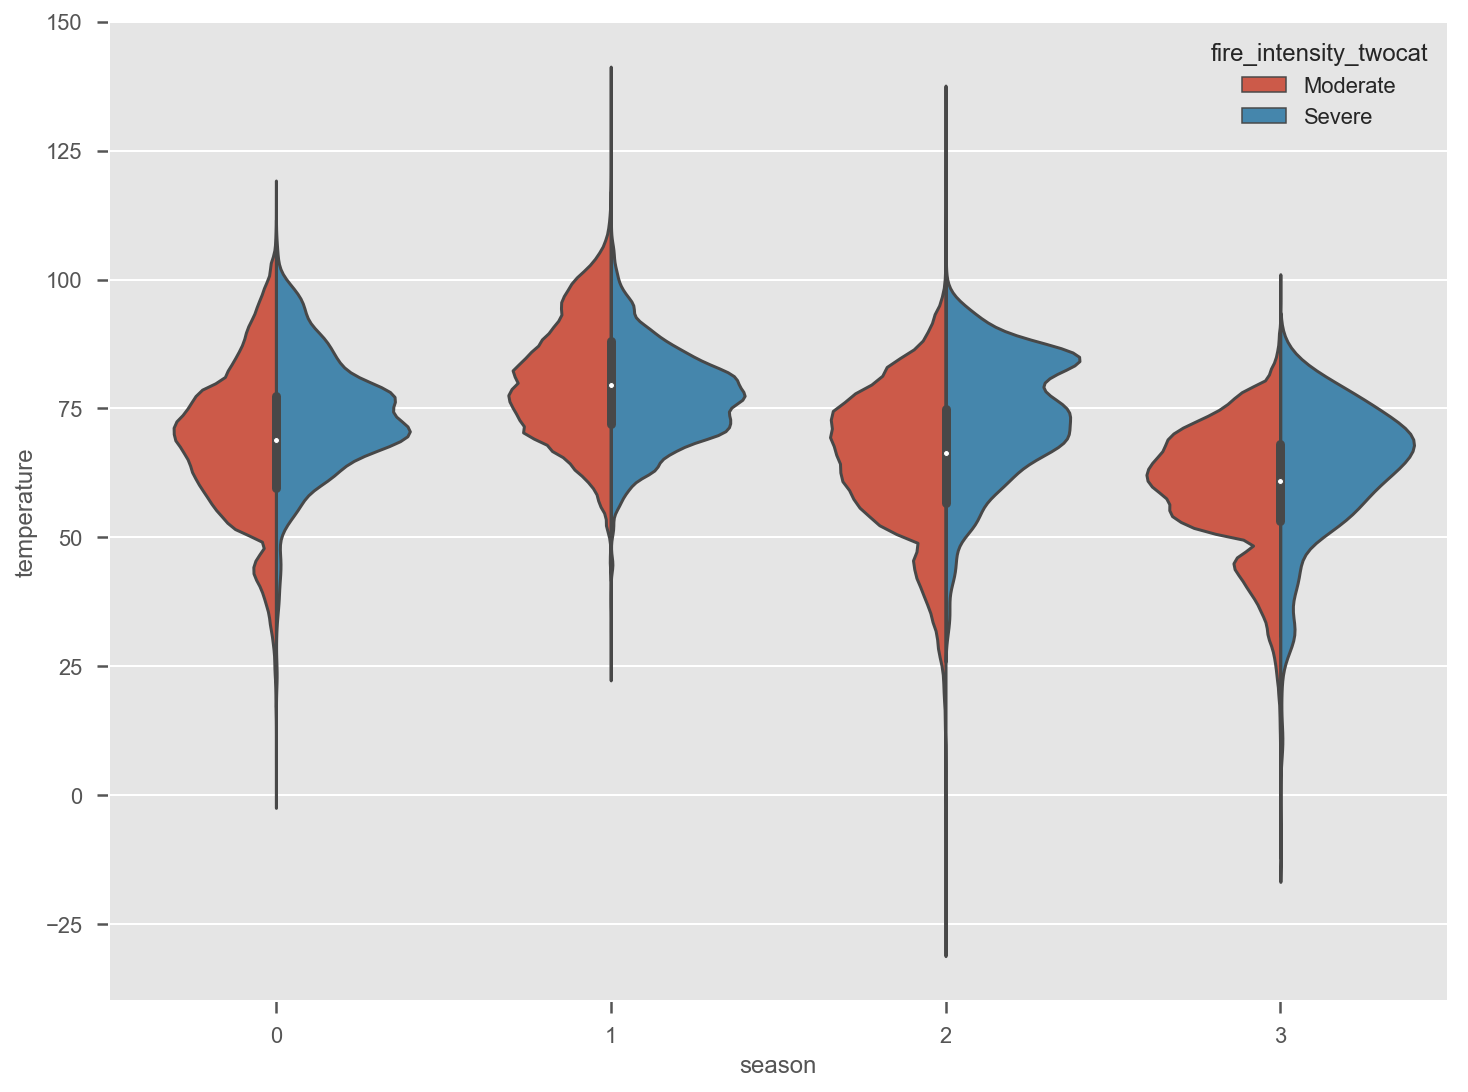

In [131]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.violinplot(x="season", y="temperature", hue="fire_intensity_twocat",
                data=dfModel, kind="violin",split=True, scale='area', ax=ax)

#### Violin Plots of the Effects of Seasonal Changes of Temperature on Fire Intensity

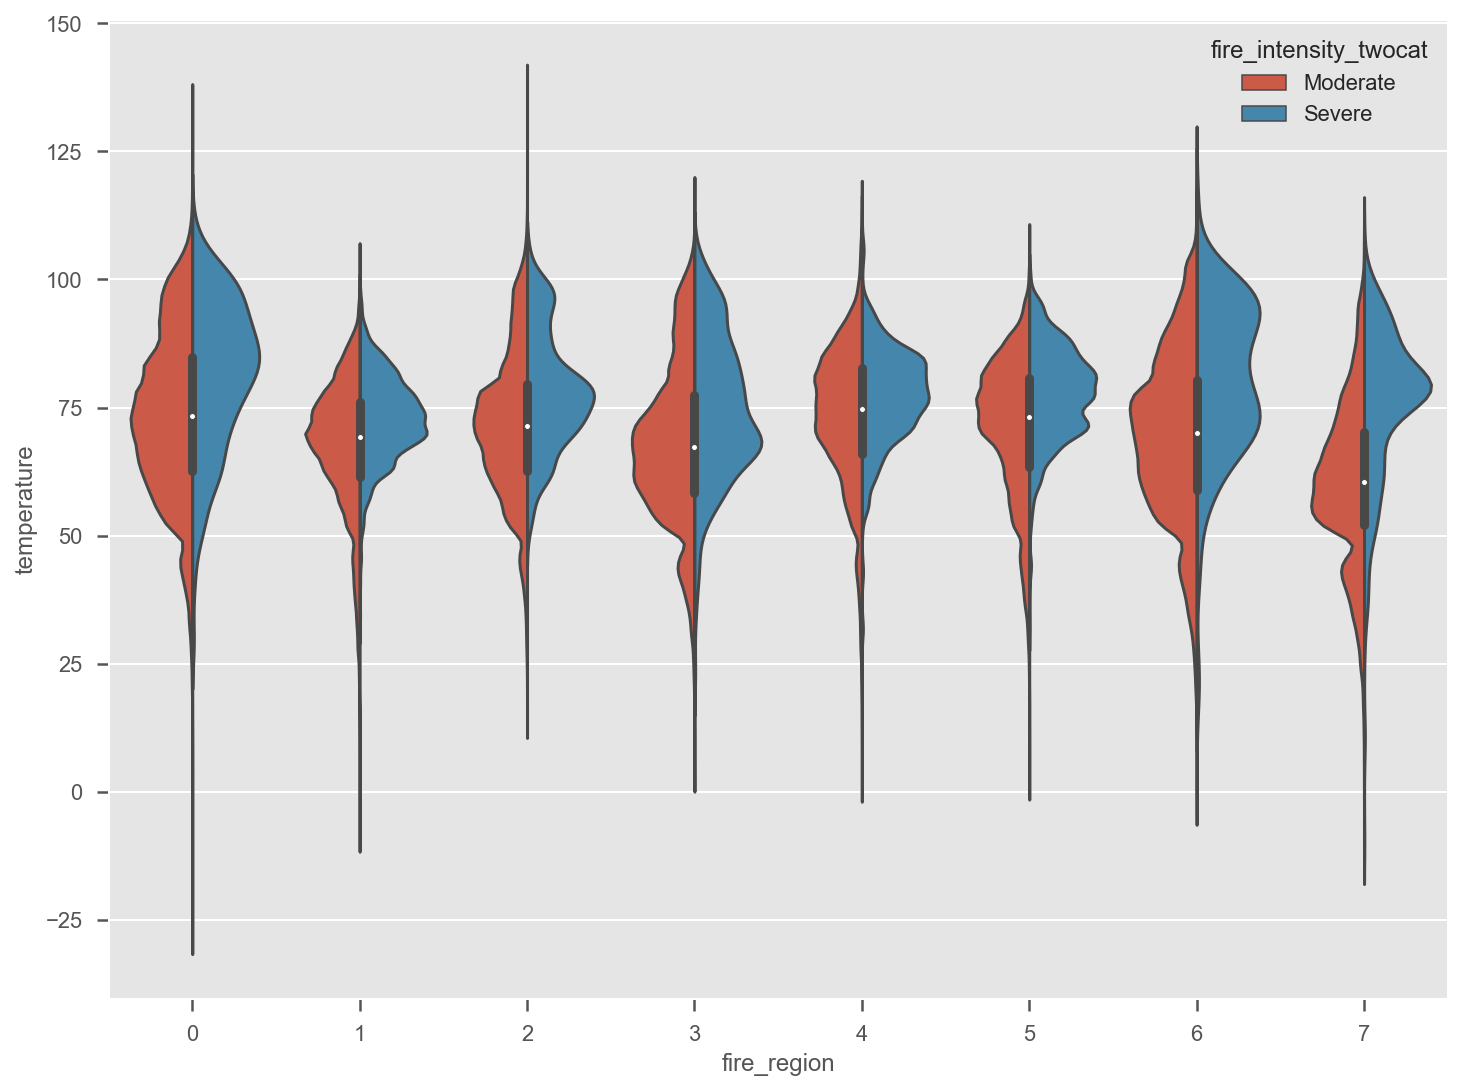

In [132]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.violinplot(x="fire_region", y="temperature", hue="fire_intensity_twocat",
                data=dfModel, kind="violin",split=True, scale='area', ax=ax)